Sources
-(Off Stats): https://www.pro-football-reference.com/years/2021/index.htm#all_team_stats


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
rookie_df = pd.read_csv('Rookie_QB_Dataset.csv')
rookie_df

FileNotFoundError: [Errno 2] No such file or directory: 'Rookie_QB_Dataset.csv'

In [38]:
#find the mean of GP and then mask to get only players above that amount of GP that way the data is not scewed
rookie_df['GP'].mean()

6.292857142857143

In [39]:
mask = rookie_df['GP']>= 6 
above_avg_QBs = rookie_df[mask] 
above_avg_QBs

,NAME,SEASON,TM,GP,CMP,ATT,PCT,YDS,AVG,YDS/G,TD,TD%,INT,INT%,SCK,SCKY,RATE
3,Skylar Thompson,2022,MIA,7,60,105,57.1,534,5.1,76.3,1,1.0,3,2.9,6,40,62.2
5,Kenny Pickett,2022,PIT,13,245,389,63.0,"2,404",6.2,184.9,7,1.8,9,2.3,27,182,76.7
6,Malik Willis,2022,TEN,8,31,61,50.8,276,4.5,34.5,0,0.0,3,4.9,10,49,42.8
9,Brock Purdy,2022,SF,9,114,170,67.1,"1,374",8.1,152.7,13,7.6,4,2.4,11,84,107.3
14,Jordan Love,2021,GB,6,36,62,58.1,411,6.6,68.5,2,3.2,3,4.8,3,23,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Ryan Lindley,2012,ARI,6,89,171,52.0,752,4.4,125.3,0,0.0,7,4.1,12,91,46.7
133,Andrew Luck,2012,IND,16,339,627,54.1,"4,374",7.0,273.4,23,3.7,18,2.9,41,246,76.5
137,Ryan Tannehill,2012,MIA,16,282,484,58.3,"3,294",6.8,205.9,12,2.5,13,2.7,35,234,76.1
138,Brandon Weeden,2012,CLE,15,297,517,57.4,"3,385",6.5,225.7,14,2.7,17,3.3,28,186,72.6


In [2]:
twentyone_off_df = pd.read_csv('2021_Offensive Stats.csv')
new_header = twentyone_off_df.iloc[0] #grab the first row for the header
twentyone_off_df = twentyone_off_df[1:] #take the data less the header row
twentyone_off_df.columns = new_header 
twentyone_off_df = twentyone_off_df.iloc[:-3]
twentyone_off_df = twentyone_off_df.drop(['Rk', 'G'], axis=1)
#twentyone_off_df = twentyone_off_df.astype(float)
twentyone_off_df
#each stat is its own dimension. PCA reduces number of features down to most important ones (Like SVM)
#PCA reduces to mot importnat number of features, SVM moves to higher dimension to project linearly and then back down to two dimensions
#PCA unsupervised SVM is supervised
#TTS making sure you are not over fitting, 
#https://www.kindsonthegenius.com/principal-components-analysispca-in-python-step-by-step/

#split into bins when you go to graph(for EXP)
#make for loop with if statements appending to a new list for low med or high EXP values, which gives categorical value to graph
#shows using EXP and other categories where the teams off fell for 2021 (high, med, low) with 32 dots
#EXP is the best indicator, High EXP would correlate to low rating since they didnt play much because of how good they were

,Tm,PF,Yds,Ply,Y/P,TO,FL,1stD,Cmp,Att,...,Yds,TD,Y/A,1stD,Pen,Yds,1stPy,Sc%,TO%,EXP
1,Dallas Cowboys,530,6919,1153,6,20,9,390,444,647,...,2119,15,4.5,111,127,1103,31,43.8,9.9,158.06
2,Tampa Bay Buccaneers,511,6901,1139,6.1,19,7,404,492,731,...,1672,18,4.3,106,97,874,25,44.3,9.8,216.14
3,Buffalo Bills,483,6493,1143,5.7,22,6,398,415,655,...,2209,20,4.8,134,113,980,28,45.2,11.3,216.68
4,Kansas City Chiefs,480,6746,1134,5.9,25,12,419,448,675,...,1955,16,4.5,119,111,925,33,48.2,13.7,261.77
5,Los Angeles Chargers,474,6634,1128,5.9,22,7,401,443,674,...,1834,18,4.3,112,116,1033,33,45.7,12,164.91
6,New England Patriots,462,6008,1052,5.7,23,10,362,364,535,...,2151,24,4.4,139,95,854,36,48,12.6,126.97
7,Cincinnati Bengals,460,6145,1046,5.9,21,7,337,384,555,...,1742,16,4,96,72,620,33,42.6,10,118.5
8,Los Angeles Rams,460,6325,1058,6,23,5,355,406,607,...,1683,10,4,99,76,637,23,45.9,12.2,161.53
9,Indianapolis Colts,451,5901,1052,5.6,19,11,354,324,521,...,2540,22,5.1,154,76,688,33,43.3,8.9,127.06
10,Green Bay Packers,450,6215,1072,5.8,13,6,375,402,593,...,1900,13,4.3,109,69,678,31,44.5,6.4,180.42


In [41]:
newDataframe.dtypes

PC1          float64
PC2          float64
EXP          float64
quantile    category
dtype: object

array([0.43718027, 0.25907295])

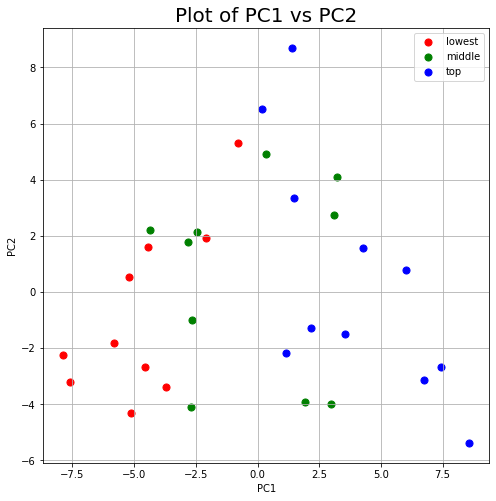

In [55]:
from sklearn.preprocessing import StandardScaler
import scipy.linalg
import sklearn.decomposition as dec
import sklearn.datasets as ds
import seaborn as sns
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
#cant visualize all of these in one plot,too many dimesnsions. DO PCA for visualization
#use PCA to make dataset smaller
#represent data in best way

features = ['PF', 'Yds', 'Ply', 'Y/P', 'TO', 'FL', '1stD', 'Cmp', 'Att', 'Yds',
       'TD', 'Int', 'NY/A', '1stD', 'Att', 'Yds', 'TD', 'Y/A', '1stD', 'Pen',
       'Yds', '1stPy', 'Sc%', 'TO%', 'EXP']

x = twentyone_off_df.loc[:, features].values

y = twentyone_off_df.loc[:, ['EXP']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

EXPDataframe = twentyone_off_df[['EXP']]

newDataframe = pd.concat([principalDataframe, EXPDataframe],axis = 1)

newDataframe = newDataframe.dropna()

newDataframe['EXP']= newDataframe['EXP'].astype('float')

newDataframe["quantile"] = pd.qcut(newDataframe["EXP"], q=[0, 0.33, 0.66, 1],
                         labels=["lowest", "middle", "top"])



fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['lowest', 'middle', 'top']

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['quantile'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

pca.explained_variance_ratio_

# plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
# plt.title('PC1 against PC2')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
#PC1 max direction of data variance, the direction that maxs spread of data
#PC2 second max direction of data variance
#PC32 is just full dataset again
#which principle componet corresponds 

In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newDataframe['PC1'].to_numpy().reshape(-1,1), newDataframe['EXP'], test_size=0.2, random_state=42) #20% of PC1 for training 80% is data I already had for PC1 and 20% is testing
reg = LinearRegression().fit(X_train, y_train)
reg.predict(X_test)
#80% for training is good
#do PC1 for each feature


array([-27.60406723, 138.96983202,  23.3158127 , -10.80138953,
       145.27881614, 160.13437112, -80.11410543])

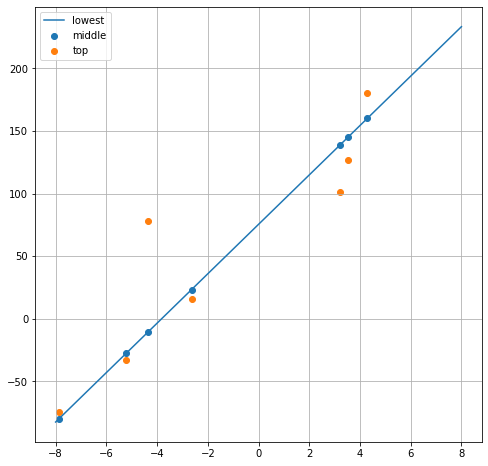

In [57]:
fig = plt.figure(figsize = (8,8)) #need this to allow you to run both
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('PC1')
#ax.set_ylabel('PC2')

#ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['lowest', 'middle', 'top']

colors = ['r', 'g', 'b']

reg.coef_, reg.intercept_
x_reg = np.linspace(-8,8,50)
plt.plot(x_reg, reg.coef_[0]*x_reg + reg.intercept_)

plt.scatter(X_test, reg.predict(X_test))

plt.scatter(X_test, y_test)

# for target, color in zip(targets,colors):
#     indicesToKeep = newDataframe['quantile'] == target
#     ax.scatter(X_train, y_train
#                , c = color
#                , s = 50) # 


ax.legend(targets)
ax.grid()

#light blue is the ones that we predicted based on the model
#orange is the exact true values, so we did not predict totally correctly
#predicting a teams EXP based on prin componet
#what features correspond to what princ componets

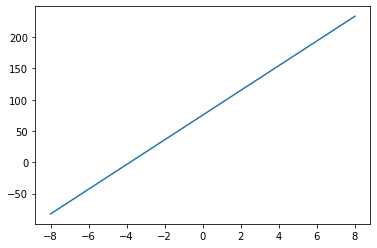

In [58]:
reg.coef_, reg.intercept_
x_reg = np.linspace(-8,8,50)
plt.plot(x_reg, reg.coef_[0]*x_reg + reg.intercept_)

In [46]:
#Get just the columns that I need or see as important
cols = []
count = 1
for column in twentyone_off_df.columns:
    if column == 'Yds':
        cols.append(f'Yds_{count}')
        count+=1
        continue
    cols.append(column)
twentyone_off_df.columns = cols
twentyone_off_DF = twentyone_off_df.rename({'Yds_1': 'Ttl_Yds', 'Yds_2': 'Pass_Yds', 'Yds_3': 'Rush_Yds', 'Yds_4': 'Pen_Yds'}, axis='columns')
columns_to_keep = ['PF','Ttl_Yds','Pass_Yds','Rush_Yds','Ply','EXP']
twentyone_off_DF = twentyone_off_DF[columns_to_keep]
twentyone_off_DF

,PF,Ttl_Yds,Pass_Yds,Rush_Yds,Ply,EXP
1,530,6919,4800,2119,1153,158.06
2,511,6901,5229,1672,1139,216.14
3,483,6493,4284,2209,1143,216.68
4,480,6746,4791,1955,1134,261.77
5,474,6634,4800,1834,1128,164.91
6,462,6008,3857,2151,1052,126.97
7,460,6145,4403,1742,1046,118.5
8,460,6325,4642,1683,1058,161.53
9,451,5901,3361,2540,1052,127.06
10,450,6215,4315,1900,1072,180.42


In [47]:
twentyone_off_DF.astype("float64").corr()

,PF,Ttl_Yds,Pass_Yds,Rush_Yds,Ply,EXP
PF,1.000000,0.909836,0.754380,0.369235,0.476455,0.928979
Ttl_Yds,0.909836,1.000000,0.855131,0.359030,0.598994,0.916065
Pass_Yds,0.754380,0.855131,1.000000,-0.176829,0.495444,0.771258
Rush_Yds,0.369235,0.359030,-0.176829,1.000000,0.245257,0.350675
Ply,0.476455,0.598994,0.495444,0.245257,1.000000,0.383542
EXP,0.928979,0.916065,0.771258,0.350675,0.383542,1.000000


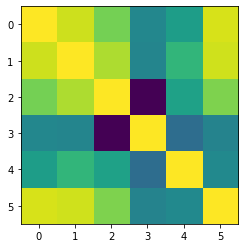

In [48]:
plt.imshow(twentyone_off_DF.astype("float64").corr()) #just tells the own data correlation how much one feature impacts another

In [59]:
import matplotlib.pyplot as plt
corr_matrix = twentyone_off_df.astype("float64").corr()
values_greater_than_09 = corr_matrix[corr_matrix > 0.9]
np.fill_diagonal(values_greater_than_09.values, np.nan)
values_greater_than_09 = values_greater_than_09.dropna(how='all').dropna(how='all', axis=1)
values_greater_than_09

ValueError: could not convert string to float: 'Dallas Cowboys'

In [ ]:
import seaborn as sns
sns.pairplot(twentyone_off_df.astype("float64").iloc[:,:4])

In [60]:
#get the data back with the teams
twentyone_off = pd.read_csv('2021_Offensive Stats.csv')
new_header = twentyone_off.iloc[0] #grab the first row for the header
twentyone_off = twentyone_off[1:] #take the data less the header row
twentyone_off.columns = new_header 
twentyone_off = twentyone_off.iloc[:-3]
twentyone_off = twentyone_off.drop(['G'], axis=1)

cols = []
count = 1
for column in twentyone_off.columns:
    if column == 'Yds':
        cols.append(f'Yds_{count}')
        count+=1
        continue
    cols.append(column)
twentyone_off.columns = cols
twentyone_off = twentyone_off.rename({'Tm' : 'TM','Yds_1': 'Ttl_Yds', 'Yds_2': 'Pass_Yds', 'Yds_3': 'Rush_Yds', 'Yds_4': 'Pen_Yds'}, axis='columns')
columns_to_keep = ['TM','PF','Ttl_Yds','Pass_Yds','EXP']
twentyone_off = twentyone_off[columns_to_keep]
#twentyone_off


    

In [61]:
twentyone_off['PF'] = twentyone_off['PF'].astype("float")
twentyone_off['EXP'] = twentyone_off['EXP'].astype("float")
twentyone_off['Pass_Yds'] = twentyone_off['Pass_Yds'].astype("float")
twentyone_off['Ttl_Yds'] = twentyone_off['Ttl_Yds'].astype("float")
twentyone_off['sum'] = twentyone_off['PF']+twentyone_off['Ttl_Yds']+twentyone_off['Pass_Yds']+twentyone_off['EXP']
twentyone_off['Rank'] = twentyone_off['sum'].rank(ascending=False)
twentyone_off = twentyone_off.sort_values(by='sum', ascending=False)
twentyone_off.T
#https://www.youtube.com/watch?v=FgakZw6K1QQ
#https://www.youtube.com/watch?v=HMOI_lkzW08



,2,1,4,5,8,3,18,11,13,10,...,24,22,26,28,32,19,27,29,31,30
TM,Tampa Bay Buccaneers,Dallas Cowboys,Kansas City Chiefs,Los Angeles Chargers,Los Angeles Rams,Buffalo Bills,Las Vegas Raiders,Arizona Cardinals,San Francisco 49ers,Green Bay Packers,...,Washington Football Team,Miami Dolphins,Atlanta Falcons,New York Jets,Jacksonville Jaguars,New Orleans Saints,Chicago Bears,Carolina Panthers,New York Giants,Houston Texans
PF,511.0,530.0,480.0,474.0,460.0,483.0,374.0,449.0,427.0,450.0,...,335.0,341.0,313.0,310.0,253.0,364.0,311.0,304.0,258.0,280.0
Ttl_Yds,6901.0,6919.0,6746.0,6634.0,6325.0,6493.0,6184.0,6352.0,6387.0,6215.0,...,5502.0,5219.0,5164.0,5208.0,5191.0,5177.0,5225.0,5081.0,4884.0,4727.0
Pass_Yds,5229.0,4800.0,4791.0,4800.0,4642.0,4284.0,4567.0,4276.0,4221.0,4315.0,...,3441.0,3651.0,3713.0,3541.0,3436.0,3186.0,3207.0,3239.0,3196.0,3305.0
EXP,216.14,158.06,261.77,164.91,161.53,216.68,77.89,119.94,130.03,180.42,...,15.8,-11.96,-18.38,-32.71,-42.52,-11.97,-40.89,-92.1,-100.13,-74.29
sum,12857.14,12407.06,12278.77,12072.91,11588.53,11476.68,11202.89,11196.94,11165.03,11160.42,...,9293.8,9199.04,9171.62,9026.29,8837.48,8715.03,8702.11,8531.9,8237.87,8237.71
Rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0


In [63]:
mask = rookie_df['SEASON']== 2022 
ttwo_avg_QBs = rookie_df[mask] 
ttwo_avg_QBs = ttwo_avg_QBs.sort_values(by='RATE', ascending=False)
nfl_teams ={
    "ARI": "Arizona Cardinals",
    "ATL": "Atlanta Falcons",
    "BAL": "Baltimore Ravens",
    "BUF": "Buffalo Bills",
    "CAR": "Carolina Panthers",
    "CHI": "Chicago Bears",
    "CIN": "Cincinnati Bengals",
    "CLE": "Cleveland Browns",
    "DAL": "Dallas Cowboys",
    "DEN": "Denver Broncos",
    "DET": "Detroit Lions",
    "GB": "Green Bay Packers",
    "HOU": "Houston Texans",
    "IND": "Indianapolis Colts",
    "JAX": "Jacksonville Jaguars",
    "KC": "Kansas City Chiefs",
    "LAC": "Los Angeles Chargers",
    "LAR": "Los Angeles Rams",
    "LV": "Las Vegas Raiders",
    "MIA": "Miami Dolphins",
    "MIN": "Minnesota Vikings",
    "NE": "New England Patriots",
    "NO": "New Orleans Saints",
    "NYG": "New York Giants",
    "NYJ": "New York Jets",
    "PHI": "Philadelphia Eagles",
    "PIT": "Pittsburgh Steelers",
    "SEA": "Seattle Seahawks",
    "SF": "San Francisco 49ers",
    "TB": "Tampa Bay Buccaneers",
    "TEN": "Tennessee Titans",
    "WAS": "Washington Football Team"
}
def replace_nfl_abbreviations(ttwo_avg_QBs, Column):
    ttwo_avg_QBs_copy = ttwo_avg_QBs.copy()
    ttwo_avg_QBs_copy[Column] = ttwo_avg_QBs_copy[Column].replace(nfl_teams)
    return ttwo_avg_QBs_copy

ttwo_avg_QBs_replaced = replace_nfl_abbreviations(ttwo_avg_QBs, "TM")
ttwo_avg_QBs_replaced

#compare the ranking position of one team to the one on the other by subtracting the positions
#make a plot of the rankings of the rookie qbs rating and then look at the margin of seperation between them and the off
#rankings when they are plotted

#combine the values for each team into one data frame with the ranking and the qb rate and see how well they correlate

#

,NAME,SEASON,TM,GP,CMP,ATT,PCT,YDS,AVG,YDS/G,TD,TD%,INT,INT%,SCK,SCKY,RATE
9,Brock Purdy,2022,San Francisco 49ers,9,114,170,67.1,"1,374",8.1,152.7,13,7.6,4,2.4,11,84,107.3
4,Bailey Zappe,2022,New England Patriots,4,65,92,70.7,781,8.5,195.3,5,5.4,3,3.3,6,40,100.9
7,Desmond Ridder,2022,Atlanta Falcons,4,73,115,63.5,708,6.2,177.0,2,1.7,0,0.0,9,33,86.4
2,Sam Howell,2022,Washington Football Team,1,11,19,57.9,169,8.9,169.0,1,5.3,1,5.3,3,11,83.0
5,Kenny Pickett,2022,Pittsburgh Steelers,13,245,389,63.0,"2,404",6.2,184.9,7,1.8,9,2.3,27,182,76.7
3,Skylar Thompson,2022,Miami Dolphins,7,60,105,57.1,534,5.1,76.3,1,1.0,3,2.9,6,40,62.2
0,Bryce Perkins,2022,Los Angeles Rams,5,19,34,55.9,161,4.7,32.2,1,2.9,2,5.9,6,50,53.7
8,Anthony Brown,2022,Baltimore Ravens,2,22,49,44.9,302,6.2,151.0,0,0.0,2,4.1,5,14,48.2
6,Malik Willis,2022,Tennessee Titans,8,31,61,50.8,276,4.5,34.5,0,0.0,3,4.9,10,49,42.8
1,Kyle Trask,2022,Tampa Bay Buccaneers,1,3,9,33.3,23,2.6,23.0,0,0.0,0,0.0,0,0,42.4


In [64]:
from sklearn.preprocessing import StandardScaler
merged_df = pd.merge(twentyone_off,ttwo_avg_QBs_replaced , on='TM')
columns_to_keep = ['RATE','sum']
merged_df = merged_df[columns_to_keep]
merged_df = merged_df.dropna()
merged_df



,RATE,sum
0,42.4,12857.14
1,53.7,11588.53
2,107.3,11165.03
3,48.2,10847.67
4,100.9,10453.97
5,42.8,9738.19
6,76.7,9467.51
7,83.0,9293.80
8,62.2,9199.04
9,86.4,9171.62


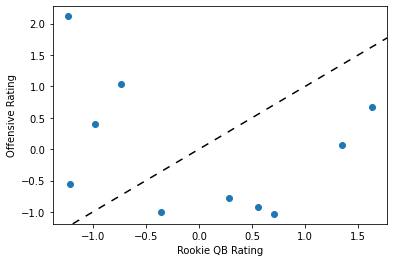

In [67]:
scaler = StandardScaler()
scale_model = scaler.fit(merged_df)
scaled_data = scale_model.transform(merged_df)
xx = np.linspace(-3, 3) #creating values between those points, x array of values
yy = .055666781 *xx - 1.1797
x = scaled_data[:,0] #RATE
y = scaled_data[:,1] #sum
plt.scatter(x, y)
plt.xlabel('Rookie QB Rating')
plt.ylabel('Offensive Rating')
plt.axline((-1, -1), slope=1, color="black", linestyle=(0, (5, 5)))
#since we can tell there is a line 

The points plotted to the right of the line show those rookie QBs with high rankings were on teams with low offensive rankings the year before. The points plotted to the left of the line represent the teams with higher offensive ratings the year before but lower preformance ratings out of their rookie QBs that they have drafted. 
This shows a negative correlation between previous year offensive rankings and how rookie QBs preform on those teams.

In [86]:
mock = pd.read_csv('Mock_Draft_2023.csv')
mock_df = mock.rename({'Team': 'Tm'}, axis = 'columns')
twentytwo_off_df = pd.read_csv('2023_Offense_Stats.csv')
new_header = twentytwo_off_df.iloc[0] #grab the first row for the header
twentytwo_off_df = twentytwo_off_df[1:] #take the data less the header row
twentytwo_off_df.columns = new_header 
twentytwo_off_df = twentytwo_off_df.iloc[:-3]
twentytwo_off_df = twentytwo_off_df.drop(['Rk', 'G'], axis=1)
#twentytwo_off_df = twentytwo_off_df.astype(float)
cols = []
count = 1
for column in twentytwo_off_df.columns:
    if column == 'Yds':
        cols.append(f'Yds_{count}')
        count+=1
        continue
    cols.append(column)
twentytwo_off_df.columns = cols
twentytwo_off_DF = twentytwo_off_df.rename({'Yds_1': 'Ttl_Yds', 'Yds_2': 'Pass_Yds', 'Yds_3': 'Rush_Yds', 'Yds_4': 'Pen_Yds'}, axis='columns')
columns_to_keep = ['Tm','PF','Ttl_Yds','Pass_Yds','Rush_Yds','Ply','EXP']
twentytwo_off_DF = twentytwo_off_DF[columns_to_keep]
twentytwo_off_DF

twentytwo_off_DF['PF'] = twentytwo_off_DF['PF'].astype("float")
twentytwo_off_DF['EXP'] = twentytwo_off_DF['EXP'].astype("float")
twentytwo_off_DF['Pass_Yds'] = twentytwo_off_DF['Pass_Yds'].astype("float")
twentytwo_off_DF['Ttl_Yds'] = twentytwo_off_DF['Ttl_Yds'].astype("float")
twentytwo_off_DF['sum'] = twentytwo_off_DF['PF']+twentytwo_off_DF['Ttl_Yds']+twentytwo_off_DF['Pass_Yds']+twentytwo_off_DF['EXP']
twentytwo_off_DF['Rank'] = twentytwo_off_DF['sum'].rank(ascending=False)
twentytwo_off_DF = twentytwo_off_DF.sort_values(by='sum', ascending=False)
twentytwo_off_DF

nfl_teams = ["Arizona Cardinals", "Atlanta Falcons", "Baltimore Ravens", "Buffalo Bills", "Carolina Panthers",
             "Chicago Bears", "Cincinnati Bengals", "Cleveland Browns", "Dallas Cowboys", "Denver Broncos",
             "Detroit Lions", "Green Bay Packers", "Houston Texans", "Indianapolis Colts", "Jacksonville Jaguars",
             "Kansas City Chiefs", "Las Vegas Raiders", "Los Angeles Chargers", "Los Angeles Rams", "Miami Dolphins",
             "Minnesota Vikings", "New England Patriots", "New Orleans Saints", "New York Giants", "New York Jets",
             "Philadelphia Eagles", "Pittsburgh Steelers", "San Francisco 49ers", "Seattle Seahawks",
             "Tampa Bay Buccaneers", "Tennessee Titans", "Washington Football Team"]

twentytwo_off_DF
mock_df

,Tm,Pick,Player
0,Carolina Panthers,1,CJ Stroud
1,Houston Texans,2,Bryce Young
2,Indianapolis Colts,4,Anthony Richardson
3,Tampa Bay Buccaneers,19,Will Levis


In [92]:
from sklearn.preprocessing import StandardScaler
merged_df_mock = pd.merge(twentytwo_off_DF,mock_df , on='Tm')
columns_to_keep = ['Tm','sum','Player']
merged_df_mock = merged_df_mock[columns_to_keep]
merged_df_mock = merged_df_mock.dropna()
merged_df_mock


,Tm,sum,Player
0,Tampa Bay Buccaneers,10794.03,Will Levis
1,Indianapolis Colts,8908.54,Anthony Richardson
2,Carolina Panthers,8543.94,CJ Stroud
3,Houston Texans,8332.41,Bryce Young


In [ ]:
ttwo_avg_QBs

In [ ]:
off_df = pd.read_csv('Offensive_Team_Data2.csv')
off_df

In [52]:
Season_list=[2017,2018,2019,2020,2021]
TM_list=["ARI", "ATL", "BAL", "BUF", "CAR", "CHI", "CIN", "CLE", "DAL", "DEN", "DET", "GB", "HOU", "IND", "JAX", "KC", "LV", "LAC", "LAR", "MIA", "MIN", "NE", "NO", "NYG", "NYJ", "PHI", "PIT", "SF", "SEA", "TB", "TEN", "WAS"]
range_PTSG_list=[]
for i in range(len(Season_list)):
    mask = off_df['SEASON']== Season_list[i] 
    off_year = off_df[mask]
    range_PTSG = (off_year['PTS/G'].max())-(off_year['PTS/G'].min())
    PTSG_min = off_year['PTS/G'].min()
    range_PTSG_list.append(range_PTSG)
    for j in (TM_list):
        mask2 = off_df['TM']== "WAS"
        team_year_df = off_df[mask2]
team_year_df

    
    
    
    
 

    

NameError: name 'off_df' is not defined

#this is a cell of testing for the cell above
loop through to get data sets of just one year at a time
-nested loop of the range of each value and 

In [51]:
Season_list=[2017,2018,2019,2020,2021]
TM_list=["ARI", "ATL", "BAL", "BUF", "CAR", "CHI", "CIN", "CLE", "DAL", "DEN", "DET", "GB", "HOU", "IND", "JAX", "KC", "LV", "LAC", "LAR", "MIA", "MIN", "NE", "NO", "NYG", "NYJ", "PHI", "PIT", "SF", "SEA", "TB", "TEN", "WAS"]
range_PTSG_list=[]
for i in range(len(Season_list)):
    season_mask = off_df['SEASON']==Season_list[i]
    season_mask = off_df[season_mask]
    range_PTSG = (off_year['PTS/G'].max())-(off_year['PTS/G'].min())
    PTSG_min = season_mask['PTS/G'].min()
    range_PTSG_list.append(range_PTSG)
    for j in (len(TM_list)):
        team_mask = off_df['TM']== TM_list[j]
        team_year_df = off_df[team_mask]
team_year_df
    

NameError: name 'off_df' is not defined

In [50]:
TM_list=["ARI", "ATL", "BAL", "BUF", "CAR", "CHI", "CIN", "CLE", "DAL", "DEN", "DET", "GB", "HOU", "IND", "JAX", "KC", "LV", "LAC", "LAR", "MIA", "MIN", "NE", "NO", "NYG", "NYJ", "PHI", "PIT", "SF", "SEA", "TB", "TEN", "WAS"]
for j in (TM_list):
    mask2 = off_df['TM']==j
    team_year_df = off_df[mask2]
    
team_year_df
#
for j in (TM_list):
        mask2 = off_df['TM']==j
        team_year_df = off_df[mask2]
        x = 
team_year_df
#
Season_list=[2017,2018,2019,2020,2021]
TM_list=["ARI", "ATL", "BAL", "BUF", "CAR", "CHI", "CIN", "CLE", "DAL", "DEN", "DET", "GB", "HOU", "IND", "JAX", "KC", "LV", "LAC", "LAR", "MIA", "MIN", "NE", "NO", "NYG", "NYJ", "PHI", "PIT", "SF", "SEA", "TB", "TEN", "WAS"]
avg_PPR=[]
for i in range(len(Season_list)):
    mask = off_df['SEASON']== Season_list[i] 
    off_year = off_df[mask]
    PPR = off_year['PTS/G'].sum()/len(TM_list)
    avg_PPR.append(PPR)
avg_PPR
#
Season_list=[2017,2018,2019,2020,2021]
TM_list=["ARI", "ATL", "BAL", "BUF", "CAR", "CHI", "CIN", "CLE", "DAL", "DEN", "DET", "GB", "HOU", "IND", "JAX", "KC", "LV", "LAC", "LAR", "MIA", "MIN", "NE", "NO", "NYG", "NYJ", "PHI", "PIT", "SF", "SEA", "TB", "TEN", "WAS"]
range_PTSG_list=[]
for i in range(len(Season_list)):
    mask = off_df['SEASON']== Season_list[i] 
    off_year = off_df[mask]
    range_PTSG = (off_year['PTS/G'].max())-(off_year['PTS/G'].min())
    PTSG_min = off_year['PTS/G'].min()
    range_PTSG_list.append(range_PTSG)
    for j in (TM_list):
        mask2 = off_df['TM']== "WAS"
        team_year_df = off_df[mask2]
team_year_df

SyntaxError: invalid syntax (<ipython-input-50-0b15748ef2e5>, line 11)

In [ ]:
TM_list=["ARI", "ATL", "BAL", "BUF", "CAR", "CHI", "CIN", "CLE", "DAL", "DEN", "DET", "GB", "HOU", "IND", "JAX", "KC", "LV", "LAC", "LAR", "MIA", "MIN", "NE", "NO", "NYG", "NYJ", "PHI", "PIT", "SF", "SEA", "TB", "TEN", "WAS"]
for j in (TM_list):
    mask2 = off_df['TM']==j
    team_year_df = off_df[mask2]
    
team_year_df

In [ ]:
#use describe to find what the bottom 50% of GP would be and then filter above that amount of GP for our data
rookie_df.describe()

In [ ]:
https://www.statmuse.com/nfl/ask/nfl-2012-rookie-qb-stats